<a href="https://colab.research.google.com/github/SriKhandavilli/Movie_rec/blob/main/Machine_Learning_Movie_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd

tmdb_movies = pd.read_csv('/content/tmdb_movies.csv')
tmdb_credits = pd.read_csv('/content/tmdb_credits.csv')

In [95]:
tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [96]:
tmdb_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [97]:
tmdb_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [98]:
tmdb_credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [99]:
import json

tmdb_movies['genres'] = tmdb_movies['genres'].apply(json.loads)
for index,i in zip(tmdb_movies.index,tmdb_movies['genres']):
    record = []
    for j in range(len(i)):
        record.append((i[j]['name'])) 
    tmdb_movies.loc[index,'genres'] = str(record)

tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(json.loads)
for index,i in zip(tmdb_movies.index,tmdb_movies['keywords']):
    record = []
    for j in range(len(i)):
        record.append((i[j]['name']))
    tmdb_movies.loc[index,'keywords'] = str(record)
    
tmdb_movies['production_companies'] = tmdb_movies['production_companies'].apply(json.loads)
for index,i in zip(tmdb_movies.index,tmdb_movies['production_companies']):
    record = []
    for j in range(len(i)):
        record.append((i[j]['name']))
    tmdb_movies.loc[index,'production_companies'] = str(record)

tmdb_credits['cast'] = tmdb_credits['cast'].apply(json.loads)
for index,i in zip(tmdb_credits.index,tmdb_credits['cast']):
    record = []
    for j in range(len(i)):
        record.append((i[j]['name']))
    tmdb_credits.loc[index,'cast'] = str(record)
 
tmdb_credits['crew'] = tmdb_credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
tmdb_credits['crew'] = tmdb_credits['crew'].apply(director)
tmdb_credits.rename(columns={'crew':'director'},inplace=True)

In [100]:
tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [101]:
tmdb_movies = tmdb_movies.merge(tmdb_credits,left_on='id',right_on='movie_id',how='left')
tmdb_movies = tmdb_movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [102]:
tmdb_movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [103]:
tmdb_movies['genres'] = tmdb_movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
tmdb_movies['genres'] = tmdb_movies['genres'].str.split(',')

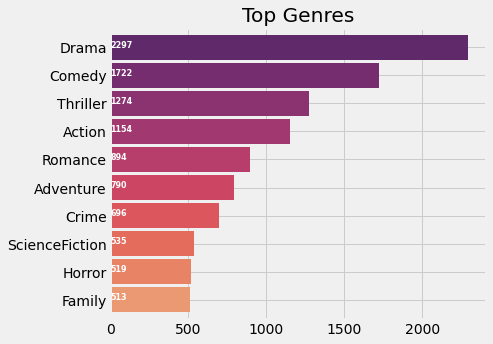

In [104]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

plt.subplots(figsize=(6,5))
record = []
for i in tmdb_movies['genres']:
    record.extend(i)
ax = pd.Series(record).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('flare', 10))
for i, v in enumerate(pd.Series(record).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=8,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [105]:
for i,j in zip(tmdb_movies['genres'],tmdb_movies.index):
    record_2=[]
    record_2=i
    record_2.sort()
    tmdb_movies.loc[j,'genres']=str(record_2)
tmdb_movies['genres'] = tmdb_movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
tmdb_movies['genres'] = tmdb_movies['genres'].str.split(',')

In [106]:
genreRecord = []
for index, row in tmdb_movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreRecord:
            genreRecord.append(genre)
genreRecord[:10]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [107]:
def isPresent(genre_record):
    binaryRecord = []
    
    for genre in genreRecord:
        if genre in genre_record:
            binaryRecord.append(1)
        else:
            binaryRecord.append(0)
    
    return binaryRecord

In [108]:
tmdb_movies['genres_bin'] = tmdb_movies['genres'].apply(lambda x: isPresent(x))
tmdb_movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [109]:
tmdb_movies['cast'] = tmdb_movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
tmdb_movies['cast'] = tmdb_movies['cast'].str.split(',')

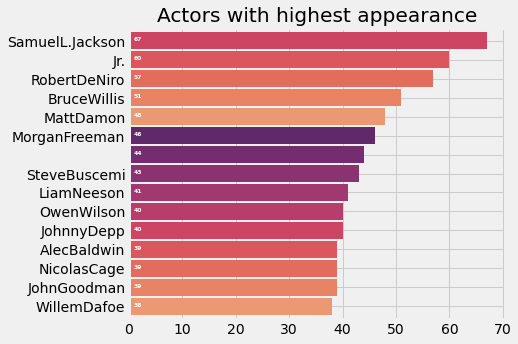

In [110]:
plt.subplots(figsize=(6,5))
record=[]
for i in tmdb_movies['cast']:
    record.extend(i)
ax=pd.Series(record).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('flare',10))
for i, v in enumerate(pd.Series(record).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=6,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [111]:
for i,j in zip(tmdb_movies['cast'],tmdb_movies.index):
    record_2 = []
    record_2 = i[:4]
    tmdb_movies.loc[j,'cast'] = str(record_2)
tmdb_movies['cast'] = tmdb_movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
tmdb_movies['cast'] = tmdb_movies['cast'].str.split(',')
for i,j in zip(tmdb_movies['cast'],tmdb_movies.index):
    record_2 = []
    record_2 = i
    record_2.sort()
    tmdb_movies.loc[j,'cast'] = str(record_2)
tmdb_movies['cast']=tmdb_movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [112]:
castRecord = []
for index, row in tmdb_movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castRecord:
            castRecord.append(i)

In [113]:
def isPresent(cast_record):
    binaryRecord = []
    
    for genre in castRecord:
        if genre in cast_record:
            binaryRecord.append(1)
        else:
            binaryRecord.append(0)
    
    return binaryRecord

In [114]:
tmdb_movies['cast_bin'] = tmdb_movies['cast'].apply(lambda x: isPresent(x))
tmdb_movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

In [115]:
def dir(s):
    if s is None:
        return ''
    return str(s)
tmdb_movies['director'] = tmdb_movies['director'].apply(dir)

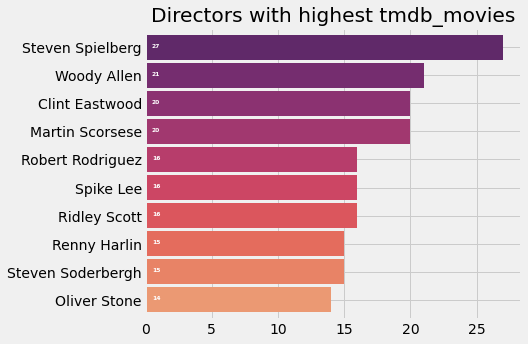

In [116]:
plt.subplots(figsize=(6,5))
ax = tmdb_movies[tmdb_movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('flare',10))
for i, v in enumerate(tmdb_movies[tmdb_movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=6,color='white',weight='bold')
plt.title('Directors with highest tmdb_movies')
plt.show()

In [117]:
directorRecord=[]
for i in tmdb_movies['director']:
    if i not in directorRecord:
        directorRecord.append(i)

In [118]:
def isPresent(director_record):
    binaryRecord = []  
    for direct in directorRecord:
        if direct in director_record:
            binaryRecord.append(1)
        else:
            binaryRecord.append(0)
    return binaryRecord

In [119]:
tmdb_movies['director_bin'] = tmdb_movies['director'].apply(lambda x: isPresent(x))
tmdb_movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [120]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

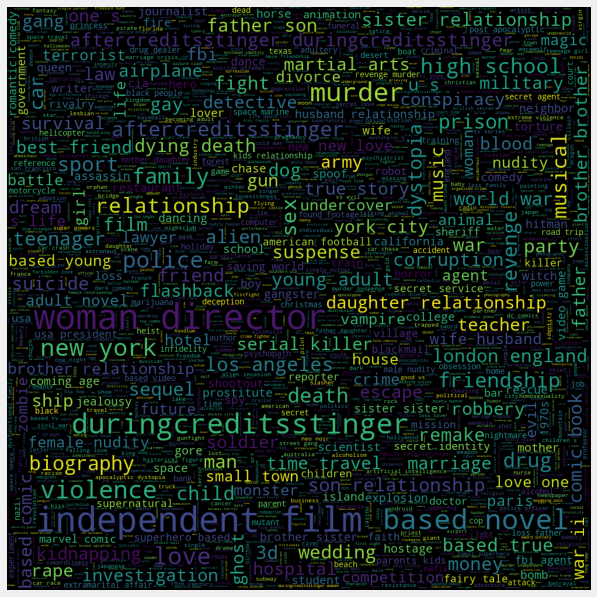

In [121]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=tmdb_movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [122]:
tmdb_movies['keywords'] = tmdb_movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
tmdb_movies['keywords'] = tmdb_movies['keywords'].str.split(',')
for i,j in zip(tmdb_movies['keywords'],tmdb_movies.index):
    record_2 = []
    record_2 = i
    tmdb_movies.loc[j,'keywords'] = str(record_2)
tmdb_movies['keywords'] = tmdb_movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
tmdb_movies['keywords'] = tmdb_movies['keywords'].str.split(',')
for i,j in zip(tmdb_movies['keywords'],tmdb_movies.index):
    record_2 = []
    record_2 = i
    record_2.sort()
    tmdb_movies.loc[j,'keywords'] = str(record_2)
tmdb_movies['keywords'] = tmdb_movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
tmdb_movies['keywords'] = tmdb_movies['keywords'].str.split(',')

In [123]:
words_record = []
for index, row in tmdb_movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_record:
            words_record.append(genre)

In [124]:
def isPresent(words):
    binaryRecord = []
    for genre in words_record:
        if genre in words:
            binaryRecord.append(1)
        else:
            binaryRecord.append(0)
    return binaryRecord

In [125]:
tmdb_movies['words_bin'] = tmdb_movies['keywords'].apply(lambda x: isPresent(x))
tmdb_movies = tmdb_movies[(tmdb_movies['vote_average']!=0)] 
tmdb_movies = tmdb_movies[tmdb_movies['director']!='']

In [126]:
from scipy import spatial

def cos_similarity(movieId1, movieId2):
    a = tmdb_movies.iloc[movieId1]
    b = tmdb_movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)

    return genreDistance + directDistance + scoreDistance + wordsDistance

In [127]:
cos_similarity(50,100)

1.9304104902359003

In [128]:
print(tmdb_movies.iloc[50])
print(tmdb_movies.iloc[100])

id                                                             9543
original_title                  Prince of Persia: The Sands of Time
genres                        [Action, Adventure, Fantasy, Romance]
cast              AlfredMolina,BenKingsley,GemmaArterton,JakeGyl...
vote_average                                                    6.2
director                                                Mike Newell
keywords          [armageddon, basedonvideogame, brotheragainstb...
genres_bin        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
cast_bin          [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
director_bin      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 50, dtype: object
id                                                             4922
original_title                  The Curious Case of Benjamin Button
genres                 [Drama, Fantasy, Mystery, Romance, Thriller]
cast                Brad

In [129]:
new_id = list(range(0,tmdb_movies.shape[0]))
tmdb_movies['new_id']=new_id
tmdb_movies=tmdb_movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
tmdb_movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [130]:
import operator
import math
import numpy as np

def project_similar_movies(name):
    new_movie = tmdb_movies[tmdb_movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in tmdb_movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = cos_similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    k = np.sqrt(5000)
    #K = int(k)
    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended tmdb_movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+tmdb_movies.iloc[neighbor[0]][2]  
        print( tmdb_movies.iloc[neighbor[0]][0]+" | Genres: "+str(tmdb_movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(tmdb_movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [131]:
project_similar_movies('Avatar')

Selected Movie:  Avatar


/usr/local/lib/python3.8/dist-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended tmdb_movies: 

The Abyss | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 7.1
The Terminator | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.3
Terminator 2: Judgment Day | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.7
Aliens | Genres: 'Action','Horror','ScienceFiction','Thriller' | Rating: 7.7
True Lies | Genres: 'Action','Thriller' | Rating: 6.8
The Wolverine | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.3
Titanic | Genres: 'Drama','Romance','Thriller' | Rating: 7.5
Superman Returns | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 5.4
Man of Steel | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.5
X-Men: Days of Future Past | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 7.5


The predicted rating for Avatar is: 6.980000
The actual rating for Avatar is 7.200000


In [132]:
project_similar_movies('Spider-Man 3')

Selected Movie:  Spider-Man 3

Recommended tmdb_movies: 

Spider-Man 2 | Genres: 'Action','Adventure','Fantasy' | Rating: 6.7
Spider-Man | Genres: 'Action','Fantasy' | Rating: 6.8
Oz: The Great and Powerful | Genres: 'Adventure','Family','Fantasy' | Rating: 5.7
The Quick and the Dead | Genres: 'Action','Western' | Rating: 6.3
Evil Dead II | Genres: 'Comedy','Fantasy','Horror' | Rating: 7.6
Army of Darkness | Genres: 'Comedy','Fantasy','Horror' | Rating: 7.3
Krull | Genres: 'Action','Adventure','Fantasy' | Rating: 5.8
The Scorpion King | Genres: 'Action','Adventure','Fantasy' | Rating: 5.3
Conan the Destroyer | Genres: 'Action','Adventure','Fantasy' | Rating: 5.8
A Simple Plan | Genres: 'Crime','Drama','Thriller' | Rating: 6.9


The predicted rating for Spider-Man 3 is: 6.420000
The actual rating for Spider-Man 3 is 5.900000


In [133]:
project_similar_movies('Titanic')

Selected Movie:  Titanic

Recommended tmdb_movies: 

True Lies | Genres: 'Action','Thriller' | Rating: 6.8
The Abyss | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 7.1
The Terminator | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.3
Aliens | Genres: 'Action','Horror','ScienceFiction','Thriller' | Rating: 7.7
Terminator 2: Judgment Day | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.7
Die Büchse der Pandora | Genres: 'Drama','Romance','Thriller' | Rating: 7.6
Avatar | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 7.2
Cruel Intentions | Genres: 'Drama','Romance','Thriller' | Rating: 6.6
Revolutionary Road | Genres: 'Drama','Romance' | Rating: 6.7
The Phantom of the Opera | Genres: 'Drama','Romance','Thriller' | Rating: 7.0


The predicted rating for Titanic is: 7.170000
The actual rating for Titanic is 7.500000
